<a href="https://colab.research.google.com/github/cocoisland/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

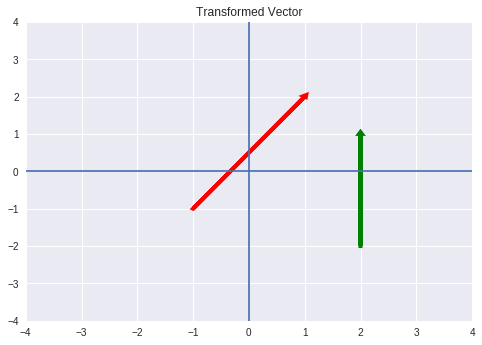

In [0]:
import matplotlib.pyplot as plt

# Vectors
v1 = [2, 3]
v2 = [0,3]

# Plot the Vectors
plt.arrow(-1,-1, v1[0], v1[1],head_width=.05, head_length=0.05, color ='red', linewidth=4)
plt.arrow(2,-2, v2[0], v2[1],head_width=.05, head_length=0.05, color ='green',linewidth=4)
plt.xlim(-4,4)          
plt.ylim(-4,4)
plt.axvline(x=0)
plt.axhline(y=0)
plt.title("Transformed Vector")
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

###The y-axis represents the range of output values from a function where the x-axis represents the domain of input values. When graphs don't pass thru the vertical line, there would be no y-axis of range output . Hence the graph does not represent a function.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

### Answer: Relation 2 is a function because all its x domain values are different and enable a vertical line test to pass.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

###Answer: Three dimensional domain input to one codomain of range output.
##$\mathbb{R}^3$ to $\mathbb{R}$

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

### Answer: Entropy. Any function that produces noise or entropy in its range of output.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

---
### Writing p function into  p unit vectors
\begin{align}
p(\begin{bmatrix} 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1 \\ -1 \end{bmatrix}
\\
p(\begin{bmatrix} 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

### p transformation matrix
\begin{align}
T = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\end{align}

### Testing p transformation matrix with [3,4]
\begin{align}
p(\begin{bmatrix} 3 \\ 4 \end{bmatrix}) = \begin{bmatrix} 3+12 \\ 8-3 \end{bmatrix}
=\begin{bmatrix} 15\\5\end{bmatrix}
\end{align}

\begin{align}
\begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}\begin{bmatrix} 3 \\ 4 \end{bmatrix} = \begin{bmatrix} 3+12 \\ -3+8 \end{bmatrix}=\begin{bmatrix} 15\\5 \end{bmatrix}
\end{align}

***
###Writing q function into its unit vectors
\begin{align}
q(\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}) = \begin{bmatrix} 4 \\ -1 \\ 5\end{bmatrix}
\\
q(\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1\\ 2 \\ 1 \end{bmatrix}
\\
q(\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 2\\ 3 \\ -2 \end{bmatrix}
\end{align}

### q transformation matrix
\begin{align}
T = \begin{bmatrix} 4 & 1&2 \\ -1 & 2&3 \\5&1&-2 \end{bmatrix}
\end{align}

###Testing q transformation
\begin{align}
q(\begin{bmatrix} 1 \\ 1\\1 \end{bmatrix}) = \begin{bmatrix} 4+1+2 \\ -1+2+3\\5+1-2 \end{bmatrix}
=\begin{bmatrix} 7\\4\\4\end{bmatrix}
\end{align}

\begin{align}
\begin{bmatrix} 4 & 1&2 \\ -1 & 2&3 \\5&1&-2 \end{bmatrix}
\begin{bmatrix} 1 \\ 1\\1 \end{bmatrix} = 
 \begin{bmatrix} 4+1+2 \\ -1+2+3\\5+1-2 \end{bmatrix}
=\begin{bmatrix} 7\\4\\4\end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
### answer refer to 4.1 above.

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

###Eigenvectors are vectors that are not pointing in new direction of dimensional space during and after transformation matrix.

###Eigenvalues are the scalar that represent corresponding eigenvectors which scaled during transformation.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

### Problems seeing beyond 4 dimensional spaces. Problems plotting beyond 3 dimensional spaces.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

### At least 5 observations for 1 features.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [55]:
features = ['sepal_length','sepal_width','petal_length','petal_width']

# mean of dataset
means = np.mean(df, axis=1)

# extracting the features.
X= df.loc[:, features]

#center columns by substracting the column means
centered_data= X.sub(means , axis=0)

# calculate covariance matrix of centered matrix
# We're not going to find the covariacne matrix by the (Z^T)(Z) method, I trust this function more
covariance_matrix = np.cov(centered_data)
#print("\n Covariance Matrix: \n", covariance_matrix)

# eigendecomposition of covariance matrix

from numpy.linalg import eig
values, vectors = eig(covariance_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)

# project data
P = vectors.T.dot(centered_data)
#print("\n Projected Data: \n", P)


 Eigenvectors: 
 [[ 0.07708907+0.00000000e+00j -0.12142147+0.00000000e+00j
  -0.00161714+0.00000000e+00j ...  0.22624725+0.00000000e+00j
  -0.09559823-2.09119332e-03j -0.09559823+2.09119332e-03j]
 [ 0.07531683+0.00000000e+00j -0.09991733+0.00000000e+00j
  -0.08131319+0.00000000e+00j ...  0.02457938+0.00000000e+00j
  -0.01038574-2.27186105e-04j -0.01038574+2.27186105e-04j]
 [ 0.07089542+0.00000000e+00j -0.11038176+0.00000000e+00j
  -0.00954864+0.00000000e+00j ... -0.00574143+0.00000000e+00j
   0.00242598+5.30677901e-05j  0.00242598-5.30677901e-05j]
 ...
 [ 0.08313541+0.00000000e+00j  0.05740987+0.00000000e+00j
  -0.0350075 +0.00000000e+00j ... -0.03376415+0.00000000e+00j
   0.01426666+3.12080583e-04j  0.01426666-3.12080583e-04j]
 [ 0.07209446+0.00000000e+00j  0.05426921+0.00000000e+00j
   0.10096278+0.00000000e+00j ... -0.11093075+0.00000000e+00j
   0.04687254+1.02532797e-03j  0.04687254-1.02532797e-03j]
 [ 0.0757483 +0.00000000e+00j  0.05705273+0.00000000e+00j
   0.12617966+0.00000000

In [54]:
# Principal Component Analysis
from sklearn.decomposition import PCA

#print("Data: \n", X)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(X)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(X)
print("\n Projected Data: \n", B)


 Eigenvectors: 
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]

 Eigenvalues: 
 [4.22484077 0.24224357]

 Projected Data: 
 [[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44003175]
 [-3.21585769  0.14161557]
 [-2.30312854  0.10552268]
 [-2.35617109 -0.03120959]
 [-2.50791723 -0.13905634]
 [-2.469056    0.13788731]
 [-2.56239095  0.37468456]
 [-2.63982127  0.31929007]
 [-2.63284791 -0.19007583]
 [-2.588

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)